In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

meas = Base.classes.measurement
stat = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [9]:
# Look at the Measurement data

first_row = session.query(meas).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x221c07884c0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [10]:
# Look at the Station data

first_row = session.query(stat).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x221c07932e0>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 1,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Precipitation Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Find the most recent date in the data set.

recent_date = session.query(meas.date).order_by(meas.date.desc()).first()
recent_date

('2017-08-23')

In [42]:
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

yearly_data = session.query(meas.date, meas.prcp).filter(meas.date > '2016-08-23').filter(meas.date <= '2017-08-23').order_by(meas.date).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(yearly_data)
prcp_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


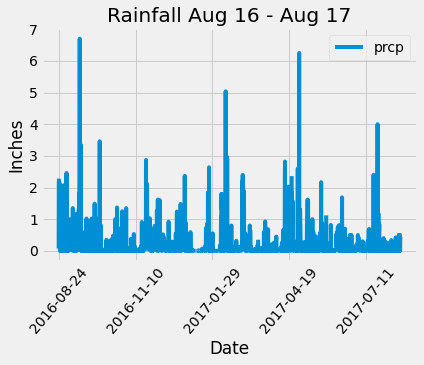

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot('date','prcp')
plt.title('Rainfall Aug 16 - Aug 17')
plt.xlabel('Date')
plt.ylabel('Inches')

plt.xticks(rotation = 50)
plt.savefig("Resources/prcp.png")

plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset

total_stations = session.query(stat.id).count()
total_stations

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stat = session.query(*[meas.station,func.count(meas.id)]).group_by(meas.station).order_by(func.count(meas.id).desc()).all()
active_stat

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Min temp
min_temp = session.query(*[func.min(meas.tobs)]).group_by(meas.station).order_by(func.count(meas.id).desc()).first()

min_temp

(54.0)

In [19]:
# Max temp
max_temp = session.query(*[func.max(meas.tobs)]).group_by(meas.station).order_by(func.count(meas.id).desc()).first()

max_temp

(85.0)

In [20]:
# Avg temp
avg_temp = session.query(*[func.avg(meas.tobs)]).group_by(meas.station).order_by(func.count(meas.id).desc()).first()

avg_temp

(71.66378066378067)

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

final_query = session.query(meas.date, meas.tobs, meas.station).\
            filter(meas.date > '2016-08-23').filter(meas.date <= '2017-08-23').\
            filter(meas.station == 'USC00519281').order_by(meas.date).all()

final_df = pd.DataFrame(final_query)
final_df.set_index('date')
final_df

,date,tobs,station
0,2016-08-24,77.0,USC00519281
1,2016-08-25,80.0,USC00519281
2,2016-08-26,80.0,USC00519281
3,2016-08-27,75.0,USC00519281
4,2016-08-28,73.0,USC00519281
...,...,...,...
346,2017-08-14,77.0,USC00519281
347,2017-08-15,77.0,USC00519281
348,2017-08-16,76.0,USC00519281
349,2017-08-17,76.0,USC00519281


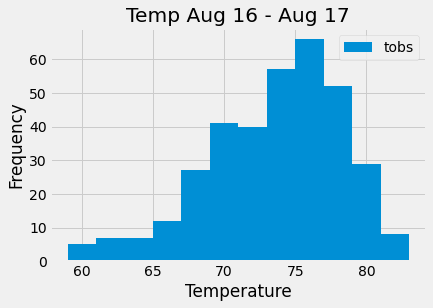

In [41]:
final_df.plot.hist(bins = 12)
plt.title('Temp Aug 16 - Aug 17')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('Resources/station.png')
plt.show()

# Close session

In [23]:
# Close Session
session.close()